In [1]:
from google.colab import drive
drive.mount('/content/drive')
%cd drive/My\ Drive/Datasets/CVI_mini_task

ModuleNotFoundError: No module named 'google.colab'

In [0]:
!ls

document_adv.png  document_basic.png  imdb_small.csv


In [0]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

In [0]:
img1 = cv2.imread('document_basic.png')
img2 = cv2.imread('document_adv.png')

In [0]:
type(img1)

numpy.ndarray

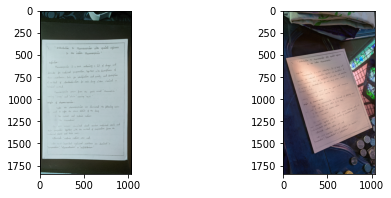

In [0]:
f = plt.figure(figsize=(8,3))
ax1 = f.add_subplot('121')
ax2 = f.add_subplot('122')
ax1.imshow(img1)
ax2.imshow(img2)
plt.show()

In [0]:
img1_gr = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img2_gr = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

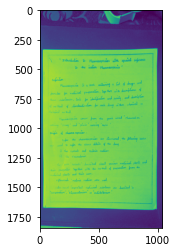

In [0]:
plt.imshow(img1_gr)

In [0]:
im1 = cv2.GaussianBlur(img1_gr,(11,11),0)
im2 = cv2.GaussianBlur(img2_gr,(11,11),0)

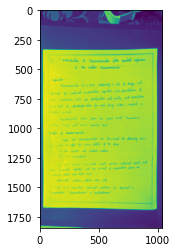

In [0]:
plt.imshow(im1)

In [0]:
tmp1 = cv2.Canny(im1,50,50)
tmp2 = cv2.Canny(im2,50,50)

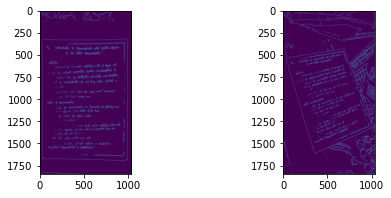

In [0]:
f = plt.figure(figsize=(8,3))
ax1 = f.add_subplot('121')
ax2 = f.add_subplot('122')
ax1.imshow(tmp1)
ax2.imshow(tmp2)
plt.show()

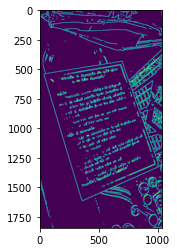

In [0]:
kernel = np.ones((3,3),np.uint8)
dil_1 = cv2.dilate(tmp1,kernel,iterations = 3)
dil_2 = cv2.dilate(tmp2,kernel,iterations = 1)
plt.imshow(dil_2)

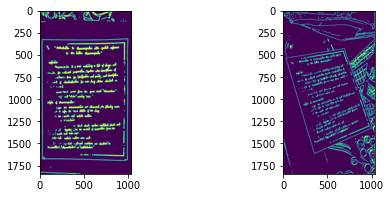

In [0]:
opening = cv2.morphologyEx(dil_1, cv2.MORPH_OPEN, kernel)
pre_1 = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, kernel)

opening = cv2.morphologyEx(dil_2, cv2.MORPH_OPEN, kernel)
pre_2 = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, kernel)

f = plt.figure(figsize=(8,3))
ax1 = f.add_subplot('121')
ax2 = f.add_subplot('122')
ax1.imshow(pre_1)
ax2.imshow(pre_2)
plt.show()

In [0]:
tmp1 = pre_1.copy()
tmp2 = pre_2.copy()

In [0]:
cnt1, hy1 = cv2.findContours(tmp1,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
cnt2, hy2 = cv2.findContours(tmp2,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

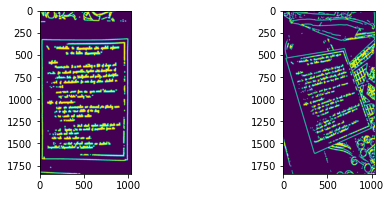

In [0]:
tmp1 = cv2.drawContours(tmp1, cnt1, -1, 255, 3)
tmp2 = cv2.drawContours(tmp2, cnt2, -1, 255, 3)

f = plt.figure(figsize=(8,3))
ax1 = f.add_subplot('121')
ax2 = f.add_subplot('122')
ax1.imshow(tmp1)
ax2.imshow(tmp2)
plt.show()

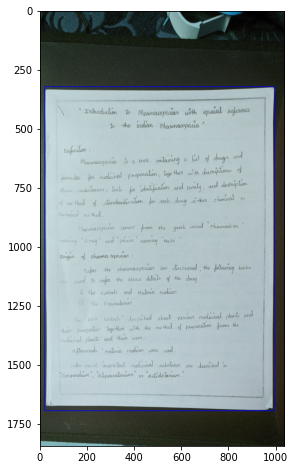

In [0]:
#cv2.drawContours(t, cnt1, -1, 255, 3)
t = img1.copy()
c = max(cnt1, key = cv2.contourArea)
rect = cv2.minAreaRect(c)
box = cv2.boxPoints(rect)
box = np.int0(box)
    # draw the biggest contour (c) in green
f = plt.figure(figsize=(15,8))
ax = f.add_subplot('111')
ax.imshow(cv2.drawContours(t,[box],0,(0,0,255),2))

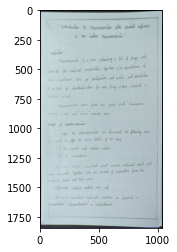

In [0]:
# assign cornerpoints of the region of interest
pts1 = np.float32([box[1],box[0],box[2],box[3]])
# provide new coordinates of cornerpoints
pts2 = np.float32([[0,0],[0,1843],[1036,0],[1036,1843]])

# determine and apply transformationmatrix
M = cv2.getPerspectiveTransform(pts1,pts2)
result = cv2.warpPerspective(t,M,(1036,1843))
result_img1 = result.copy()
plt.imshow(result)

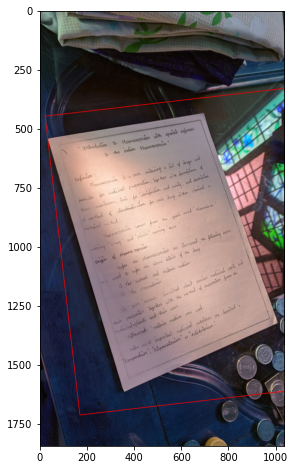

In [0]:
t = img2.copy()
c = max(cnt2, key = cv2.contourArea)
rect = cv2.minAreaRect(c)
box = cv2.boxPoints(rect)
box = np.int0(box)
#print(box)
    # draw the biggest contour (c) in green

f = plt.figure(figsize=(15,8))
ax = f.add_subplot('111')
ax.imshow(cv2.drawContours(t,[box],0,(255,0,0),2))

In [0]:
img1.shape

(1843, 1036, 3)

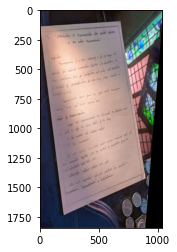

In [0]:
# assign cornerpoints of the region of interest
pts1 = np.float32([box[1],box[0],box[2],box[3]])
# provide new coordinates of cornerpoints
pts2 = np.float32([[0,0],[0,1843],[1036,0],[1036,1843]])

# determine and apply transformationmatrix
M = cv2.getPerspectiveTransform(pts1,pts2)
result = cv2.warpPerspective(t,M,(1036,1843))
plt.imshow(result)

In [0]:
i2 = result.copy()

In [0]:
i2 = cv2.cvtColor(i2, cv2.COLOR_BGR2GRAY)

In [0]:
i2 = cv2.GaussianBlur(i2,(11,11),0)

In [0]:
i2 = cv2.Canny(i2,50,50)

In [0]:
i2 = cv2.dilate(i2,kernel,iterations = 1)

In [0]:
i2 = cv2.morphologyEx(i2, cv2.MORPH_OPEN, kernel)

In [0]:
i2 = cv2.morphologyEx(i2, cv2.MORPH_CLOSE, kernel)

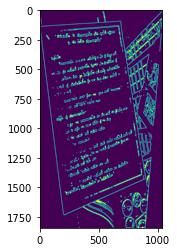

In [0]:
plt.imshow(i2)

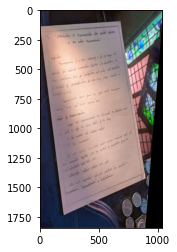

In [0]:
plt.imshow(result)


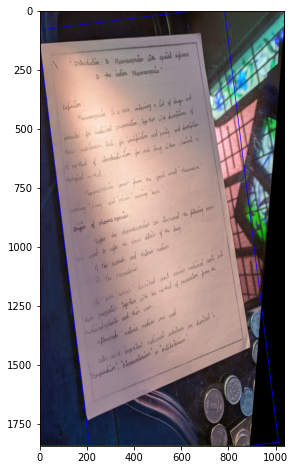

In [0]:
i2 = result.copy()
tmp = result.copy()
i2 = cv2.cvtColor(i2, cv2.COLOR_BGR2GRAY)
i2 = cv2.GaussianBlur(i2,(3,3),0)
i2 = cv2.Canny(i2,100,200)
i2 = cv2.dilate(i2,kernel,iterations = 1)
i2 = cv2.morphologyEx(i2, cv2.MORPH_OPEN, kernel)
i2 = cv2.morphologyEx(i2, cv2.MORPH_CLOSE, kernel)

c2, h2 = cv2.findContours(i2,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

c = max(c2, key = cv2.contourArea)
rect = cv2.minAreaRect(c)
box = cv2.boxPoints(rect)
box = np.int0(box)
#print(box)
    # draw the biggest contour (c) in green
f = plt.figure(figsize=(15,8))
ax = f.add_subplot('111')
ax.imshow(cv2.drawContours(tmp,[box],0,(0,0,255),2))

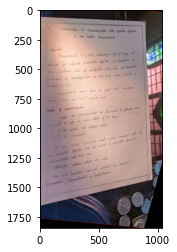

In [0]:
# assign cornerpoints of the region of interest
pts1 = np.float32([box[1],box[0],box[2],box[3]])
# provide new coordinates of cornerpoints
pts2 = np.float32([[0,0],[0,1843],[1036,0],[1036,1843]])

# determine and apply transformationmatrix
M = cv2.getPerspectiveTransform(pts1,pts2)
result2 = cv2.warpPerspective(result,M,(1036,1843))
plt.imshow(result2)

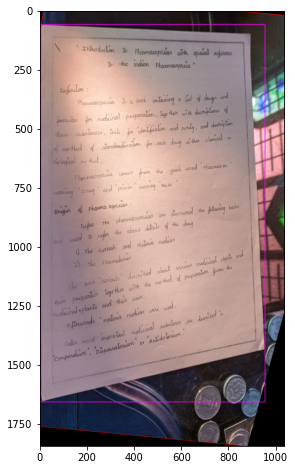

In [0]:
i2 = result2.copy()
tmp = result2.copy()
i2 = cv2.cvtColor(i2, cv2.COLOR_BGR2GRAY)
i2 = cv2.GaussianBlur(i2,(5,5),0)
i2 = cv2.Canny(i2,150,190)
i2 = cv2.dilate(i2,kernel,iterations = 3)
i2 = cv2.morphologyEx(i2, cv2.MORPH_OPEN, kernel)
i2 = cv2.morphologyEx(i2, cv2.MORPH_CLOSE, kernel)

c2, h2 = cv2.findContours(i2,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

c = max(c2, key = cv2.contourArea)
rect = cv2.minAreaRect(c)
box = cv2.boxPoints(rect)
box = np.int0(box)

f = plt.figure(figsize=(15,8))
ax = f.add_subplot('111')
ax.imshow(cv2.drawContours(tmp,[box],0,(255,0,255),2))

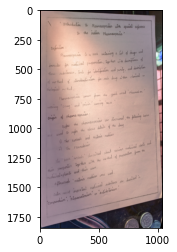

In [0]:
# assign cornerpoints of the region of interest
pts1 = np.float32([box[1],box[0],box[2],box[3]])
# provide new coordinates of cornerpoints
pts2 = np.float32([[0,0],[0,1843],[1036,0],[1036,1843]])

# determine and apply transformationmatrix
M = cv2.getPerspectiveTransform(pts1,pts2)
result3 = cv2.warpPerspective(result2,M,(1036,1843))
plt.imshow(result3)

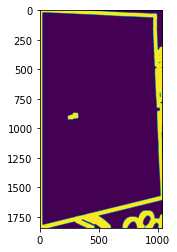

In [0]:
i2 = result3.copy()
tmp = result3.copy()
#i2 = cv2.cvtColor(i2, cv2.COLOR_BGR2GRAY)
i2 = cv2.GaussianBlur(i2,(17,17),0)
i2 = cv2.Canny(i2,10,100)
kernel2 = np.ones((3,3),np.uint8)
i2 = cv2.dilate(i2,kernel2,iterations = 15)
#i2 = cv2.morphologyEx(i2, cv2.MORPH_OPEN, kernel)
#i2 = cv2.morphologyEx(i2, cv2.MORPH_CLOSE, kernel)
plt.imshow(i2)

In [0]:
for i in range(i2.shape[0]):
  for j in range(i2.shape[1]):
    if(i2[i][j]==0):
      i2[i][j]=255
    else:
      i2[i][j]=0

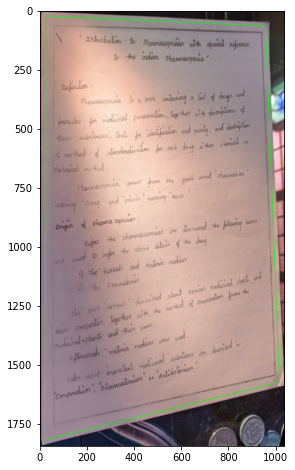

In [0]:
tmp = result3.copy()
c2, h2 = cv2.findContours(i2,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

c = max(c2, key = cv2.contourArea)
epsilon = 0.01*cv2.arcLength(c, True)
approx = cv2.approxPolyDP(c, epsilon, True)

rect = cv2.minAreaRect(approx)
box = cv2.boxPoints(rect)
box = np.int0(box)
#print(box)
    # draw the biggest contour (c) in green

c = max(c2, key = cv2.contourArea)
epsilon = 0.009*cv2.arcLength(c, True)
approx = cv2.approxPolyDP(c, epsilon, True)

f = plt.figure(figsize=(15,8))
ax = f.add_subplot('111')
ax.imshow(cv2.drawContours(tmp,[approx],0,(0,255,0),2))

In [0]:
approx

array([[[  24,   20]],

       [[  23, 1816]],

       [[1012, 1572]],

       [[ 953,   63]]], dtype=int32)

In [0]:
# assign cornerpoints of the region of interest
pts1 = np.float32([approx[0],approx[1],approx[3],approx[2]])
# provide new coordinates of cornerpoints
pts2 = np.float32([[0,0],[0,1843],[1036,0],[1036,1843]])

# determine and apply transformationmatrix
M = cv2.getPerspectiveTransform(pts1,pts2)
result4 = cv2.warpPerspective(result3,M,(1036,1843))
result_img2 = result4.copy()

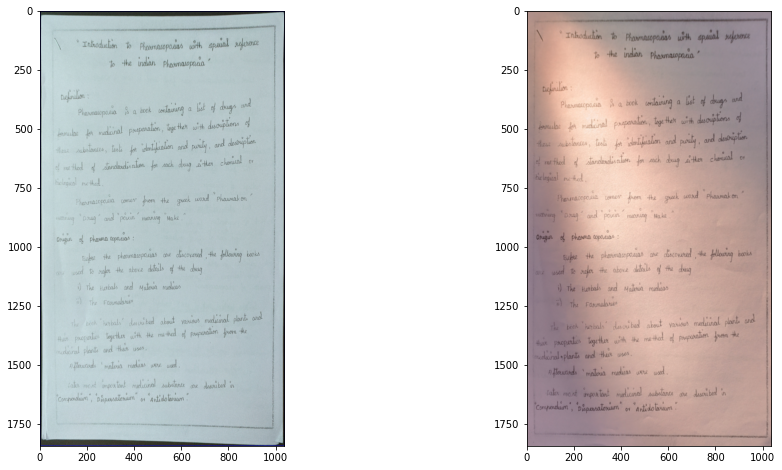

In [0]:
f = plt.figure(figsize=(16,8))
ax1 = f.add_subplot('121')
ax2 = f.add_subplot('122')
ax1.imshow(result_img1)
ax2.imshow(result_img2)
plt.show()

In [0]:
res_img1 = cv2.cvtColor(result_img1, cv2.COLOR_BGR2GRAY)
res_img2 = cv2.cvtColor(result_img2, cv2.COLOR_BGR2GRAY)

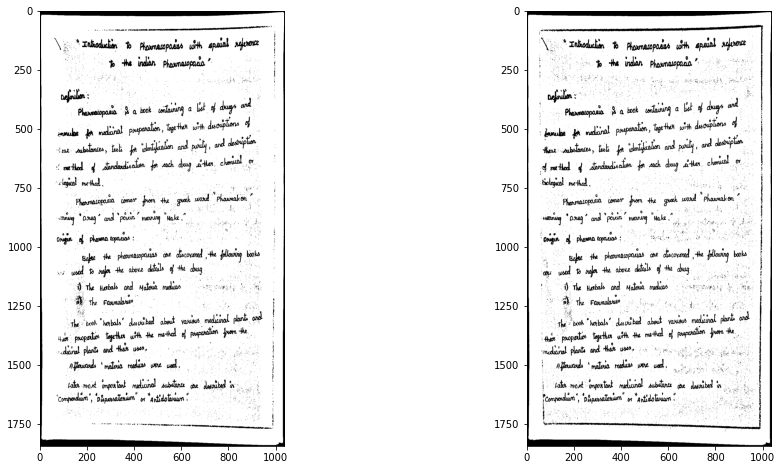

In [0]:
thresh1 = cv2.adaptiveThreshold(res_img1, 255, cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY, 199, 5)
final_bas = cv2.adaptiveThreshold(res_img1, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY, 199, 5) 

f = plt.figure(figsize=(16,8))
ax1 = f.add_subplot('121')
ax2 = f.add_subplot('122')
ax1.imshow(thresh1,cmap='gray')
ax2.imshow(final_bas,cmap='gray')
plt.show()

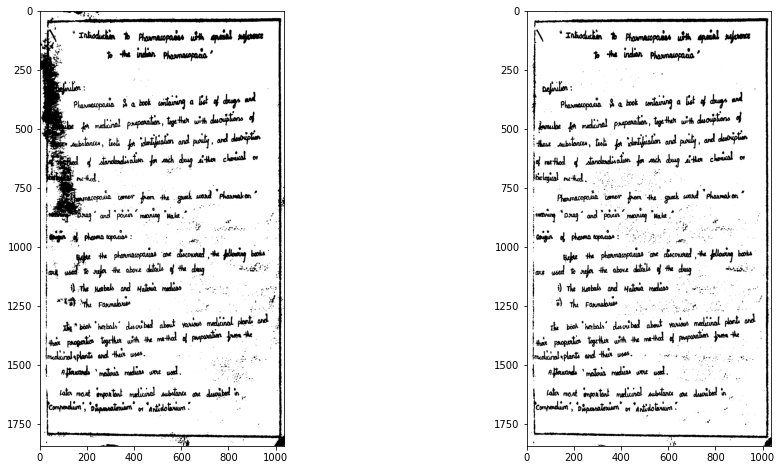

In [0]:
thresh1 = cv2.adaptiveThreshold(res_img2, 255, cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY, 199, 5)
final_adv = cv2.adaptiveThreshold(res_img2, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY, 199, 5) 

f = plt.figure(figsize=(16,8))
ax1 = f.add_subplot('121')
ax2 = f.add_subplot('122')
ax1.imshow(thresh1,cmap='gray')
ax2.imshow(final_adv,cmap='gray')
plt.show()

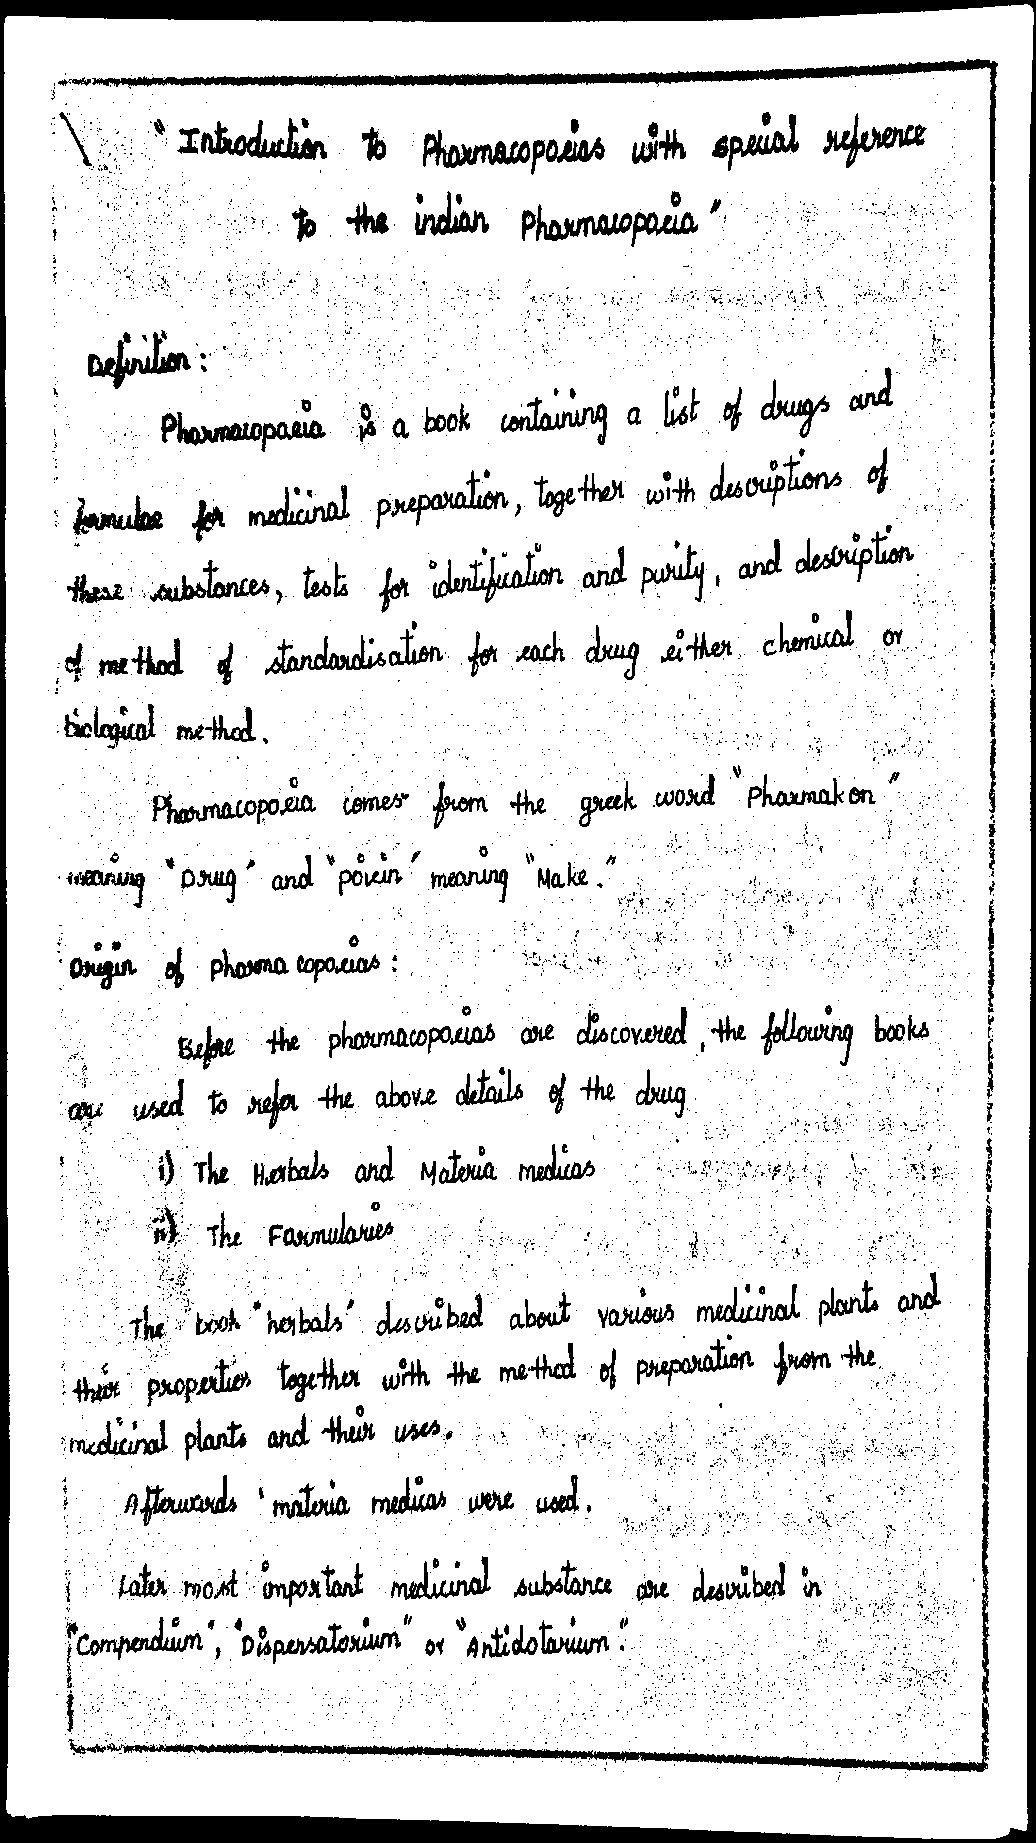

In [0]:
cv2_imshow(final_bas)

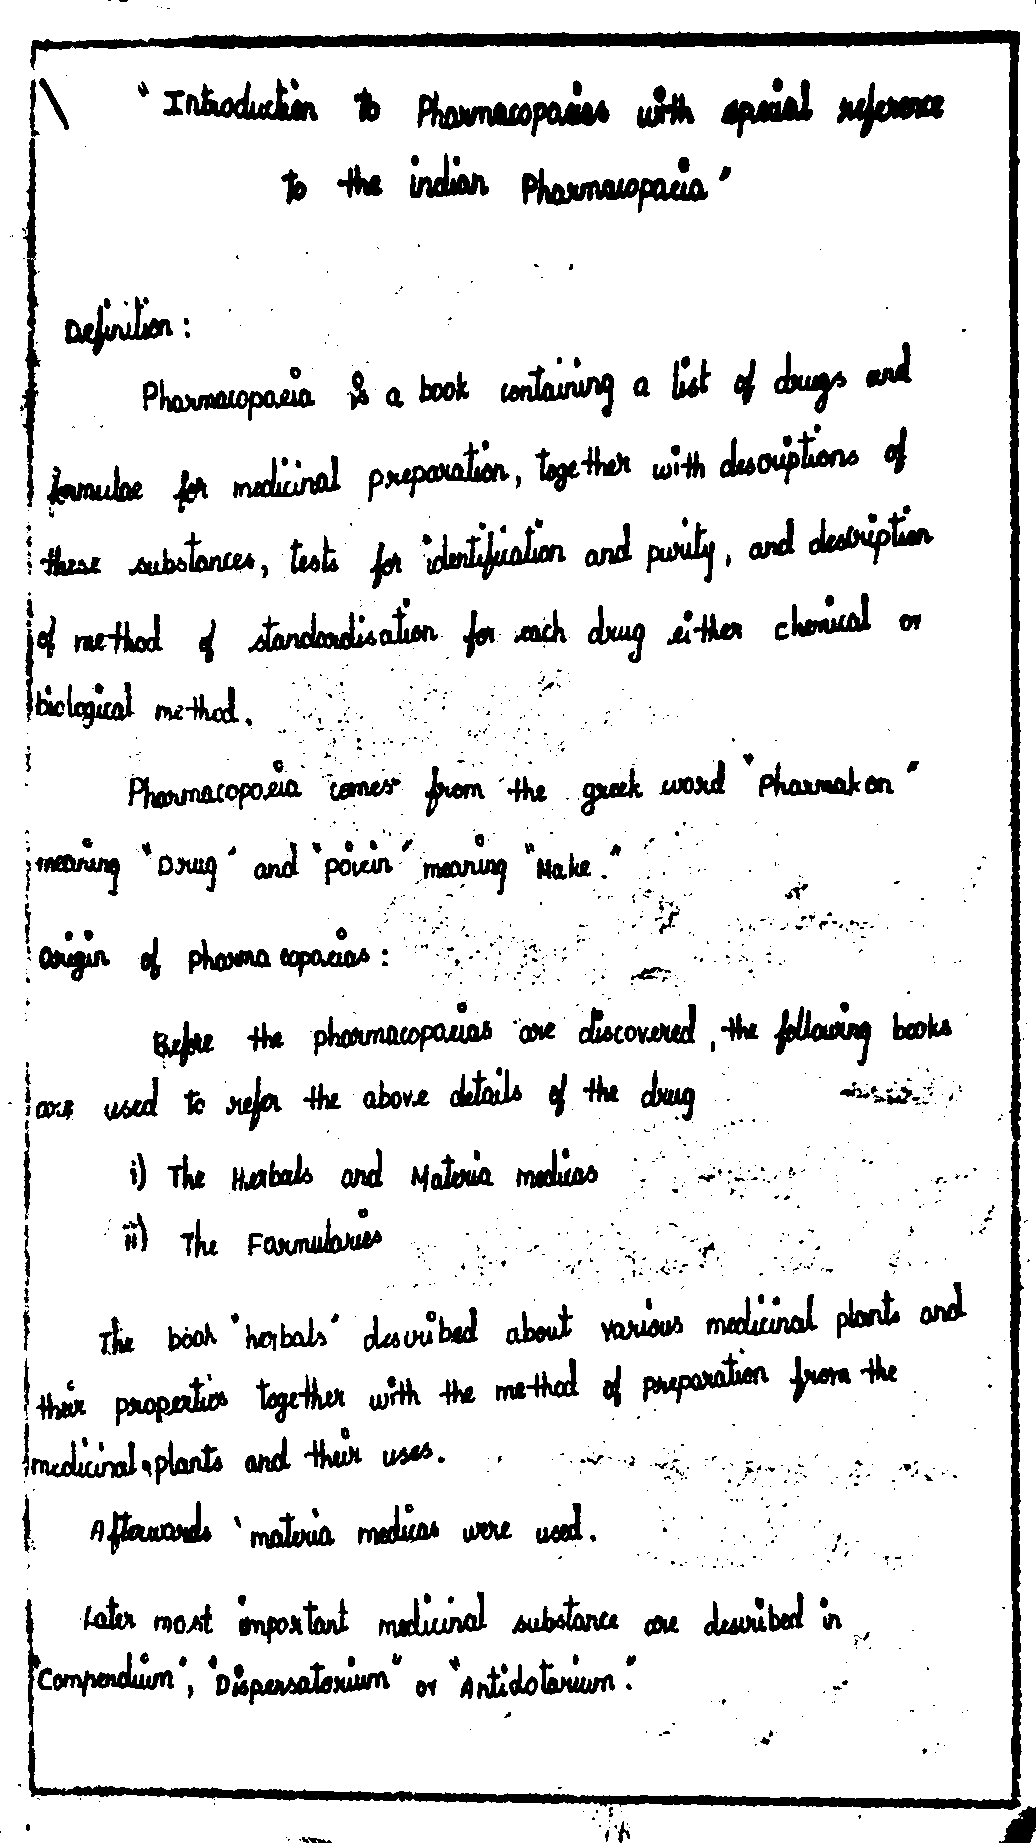

In [0]:
cv2_imshow(final_adv)